<a href="https://colab.research.google.com/github/AmanPriyanshu/lungcancer_ML/blob/master/Simple_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## UPLOADING DATASET:

Dataset: https://www.kaggle.com/imkrkannan/lung-cancer-dataset-by-staceyinrobert/kernels

In [1]:
from google.colab import files
uploaded = files.upload()

## IMPORTS:

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## LOADING DATASET:

In [3]:
data = pd.read_csv('survey lung cancer.csv')
features = data.columns

## EXPLORING THE DATA:

### Correlation

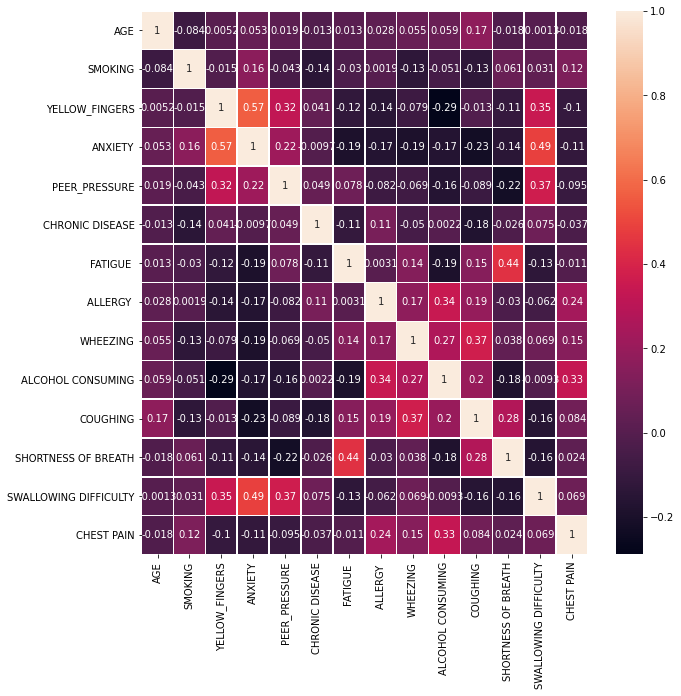

In [4]:
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot=True , linewidths=.5)

## RE-ENCODING GENDER and STATUS

In [5]:
data = data.values

In [6]:
data.T[0] = np.array([0 if i=='M' else 1 for i in data.T[0]])
data.T[-1] = np.array([0 if i=='NO' else 1 for i in data.T[-1]])

#### FEATURE-WISE EXPLORATION

In [7]:
print(features)
print(len(features))

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')
16


In [8]:
Y = data.T[-1]
X = data.T[:-1]

print('Data',X.shape,'\n', X)
print('\n\nY',Y.shape,'\n', Y)

Data (15, 309) 
 [[0 0 1 ... 0 0 0]
 [69 74 59 ... 58 67 62]
 [1 2 1 ... 2 2 1]
 ...
 [2 2 2 ... 1 2 1]
 [2 2 1 ... 1 1 2]
 [2 2 2 ... 2 2 1]]


Y (309,) 
 [1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### CHI-Square Method:

In [9]:
print(X.shape, Y.shape)
X = X.T
print(X.shape, Y.shape)

(15, 309) (309,)
(309, 15) (309,)


In [10]:
scaler = MinMaxScaler()
scaler.fit(X)
x_norm = scaler.transform(X)
feature_scores = []
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(x_norm, np.array([y for y in Y]))
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
	feature_scores.append(fs.scores_[i])

Feature 0: 0.732746
Feature 1: 0.060419
Feature 2: 0.456946
Feature 3: 4.373548
Feature 4: 3.256499
Feature 5: 5.350014
Feature 6: 1.881416
Feature 7: 2.292936
Feature 8: 14.717954
Feature 9: 8.514614
Feature 10: 11.405411
Feature 11: 8.032321
Feature 12: 0.409497
Feature 13: 11.063366
Feature 14: 4.969191


## DISCARDING USELESS FEATURES in X_red

In [11]:
X_red = np.array([X.T[3], X.T[5], X.T[8], X.T[9], X.T[10], X.T[11], X.T[13], X.T[14],])
X_red = X_red.T
print(X_red.shape)

(309, 8)


## USING PCA in X_pca

In [12]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

[0.95172303 0.0099867 ]
(309, 2)


## CLASSIFYING USING REDUCED X:

In [20]:
X_red = np.asarray(X_red).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

### Simple Perceptron


On X_red

In [28]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(8,))
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_red, Y, epochs=1000, verbose=1, validation_split=0.2)
model.summary()

Epoch 1/1000
8/8 [==============================] - 0s 23ms/step - loss: 1.9725 - accuracy: 0.1174 - val_loss: 1.8258 - val_accuracy: 0.1613
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.8908 - accuracy: 0.1174 - val_loss: 1.7500 - val_accuracy: 0.1613
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.8115 - accuracy: 0.1174 - val_loss: 1.6757 - val_accuracy: 0.1613
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.7340 - accuracy: 0.1174 - val_loss: 1.6033 - val_accuracy: 0.1613
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.6577 - accuracy: 0.1174 - val_loss: 1.5335 - val_accuracy: 0.1613
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.5844 - accuracy: 0.1215 - val_loss: 1.4656 - val_accuracy: 0.1774
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.5137 - accuracy: 0.1255 - val_loss: 1.4000 - val_accuracy: 0.1774
Epoch 8/1000
8/8 [=

On X_pca

In [29]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(2,))
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_pca, Y, epochs=1000, verbose=1, validation_split=0.2)
model.summary()

Epoch 1/1000
8/8 [==============================] - 0s 15ms/step - loss: 1.7586 - accuracy: 0.4858 - val_loss: 1.3736 - val_accuracy: 0.5484
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.7299 - accuracy: 0.4858 - val_loss: 1.3529 - val_accuracy: 0.5484
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.7018 - accuracy: 0.4899 - val_loss: 1.3324 - val_accuracy: 0.5484
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.6737 - accuracy: 0.4939 - val_loss: 1.3119 - val_accuracy: 0.5484
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.6459 - accuracy: 0.5020 - val_loss: 1.2917 - val_accuracy: 0.5484
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.6179 - accuracy: 0.5020 - val_loss: 1.2718 - val_accuracy: 0.5484
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 1.5905 - accuracy: 0.5020 - val_loss: 1.2517 - val_accuracy: 0.5484
Epoch 8/1000
8/8 [=

### ARTIFICIAL NEURAL NETWORK

X_red

In [30]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(8,)),
                                    tf.keras.layers.Dense(2, activation='sigmoid'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_red, Y, epochs=1000, verbose=1, validation_split=0.2)
model.summary()

Epoch 1/1000
8/8 [==============================] - 0s 16ms/step - loss: 0.6989 - accuracy: 0.2348 - val_loss: 0.6933 - val_accuracy: 0.5645
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.7085 - val_loss: 0.6838 - val_accuracy: 0.7903
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.8745 - val_loss: 0.6747 - val_accuracy: 0.8387
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.8826 - val_loss: 0.6660 - val_accuracy: 0.8387
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6578 - accuracy: 0.8826 - val_loss: 0.6574 - val_accuracy: 0.8387
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6484 - accuracy: 0.8826 - val_loss: 0.6492 - val_accuracy: 0.8387
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.6392 - accuracy: 0.8826 - val_loss: 0.6413 - val_accuracy: 0.8387
Epoch 8/1000
8/8 [=

In [31]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_pca, Y, epochs=1000, verbose=1, validation_split=0.2)
model.summary()

Epoch 1/1000
8/8 [==============================] - 0s 15ms/step - loss: 0.4621 - accuracy: 0.8826 - val_loss: 0.4944 - val_accuracy: 0.8387
Epoch 2/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4590 - accuracy: 0.8826 - val_loss: 0.4924 - val_accuracy: 0.8387
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4564 - accuracy: 0.8826 - val_loss: 0.4904 - val_accuracy: 0.8387
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4532 - accuracy: 0.8826 - val_loss: 0.4886 - val_accuracy: 0.8387
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4506 - accuracy: 0.8826 - val_loss: 0.4867 - val_accuracy: 0.8387
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.4478 - accuracy: 0.8826 - val_loss: 0.4849 - val_accuracy: 0.8387
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4453 - accuracy: 0.8826 - val_loss: 0.4832 - val_accuracy: 0.8387
Epoch 8/1000
8/8 [=

## NAIVE BAYES:

X_red

In [34]:
gnb = GaussianNB()
y_pred = gnb.fit(X_red[:int(0.8*X_red.shape[0])], Y[:int(0.8*X_red.shape[0])]).predict(X_red[int(0.8*X_red.shape[0]):])
accuracy = 1 - np.mean(np.abs(y_pred - Y[int(0.8*X_red.shape[0]):]))
print(accuracy)

0.9032258093357086


X_pca

In [35]:
gnb = GaussianNB()
y_pred = gnb.fit(X_pca[:int(0.8*X_red.shape[0])], Y[:int(0.8*X_red.shape[0])]).predict(X_pca[int(0.8*X_red.shape[0]):])
accuracy = 1 - np.mean(np.abs(y_pred - Y[int(0.8*X_red.shape[0]):]))
print(accuracy)

0.838709682226181


## KNN

X_red

In [37]:
neigh = KNeighborsClassifier(n_neighbors=int(X_red.shape[0]*0.1))
neigh.fit(X_red[:int(0.8*X_red.shape[0])], Y[:int(0.8*X_red.shape[0])])
y_pred = neigh.predict(X_red[int(0.8*X_red.shape[0]):])
accuracy = 1 - np.mean(np.abs(y_pred - Y[int(0.8*X_red.shape[0]):]))
print(accuracy)

0.9193548411130905


X_pca

In [38]:
neigh = KNeighborsClassifier(n_neighbors=int(X_red.shape[0]*0.1))
neigh.fit(X_pca[:int(0.8*X_red.shape[0])], Y[:int(0.8*X_red.shape[0])])
y_pred = neigh.predict(X_pca[int(0.8*X_red.shape[0]):])
accuracy = 1 - np.mean(np.abs(y_pred - Y[int(0.8*X_red.shape[0]):]))
print(accuracy)

0.838709682226181


## RANDOM FOREST:

X_red

In [42]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_red[:int(0.8*X_red.shape[0])], Y[:int(0.8*X_red.shape[0])])
y_pred = clf.predict(X_red[int(0.8*X_red.shape[0]):])
accuracy = 1 - np.mean(np.abs(y_pred - Y[int(0.8*X_red.shape[0]):]))
print(accuracy)

0.9354838728904724


X_pca

In [43]:
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(X_pca[:int(0.8*X_red.shape[0])], Y[:int(0.8*X_red.shape[0])])
y_pred = clf.predict(X_pca[int(0.8*X_red.shape[0]):])
accuracy = 1 - np.mean(np.abs(y_pred - Y[int(0.8*X_red.shape[0]):]))
print(accuracy)

0.8225806504487991
